<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap1_IntrodTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uma  Introdução Informal às Séries Temporais em Python** 

___


Neste capítulo você vai aprender:

* O que são Série Temporais e as principais tarefas de interesse 
* O que são Tendência, Ciclos, Sazonalidade e Resíduos e como as Séries Temporais são decompostas nesses fatores
* Como empregar algumas ferramentas úteis de `Python` na manipulação de Séries Temporais





Séries Temporais desempenham um papel importante no nosso dia a dia. Vários fenômenos, negócios e dispositivos geram dados ao longo do tempo e que podem ser empregados para previsões, análises etc. Neste capítulo você vai entender o que caracteriza esses dados, como eles podem ser descompostos em conjuntos de dados mais simples para análise e como empregar algumas ferramentas simples de manipulação dessas séries que serão bastante úteis nos capítulos seguintes e para análise de Séries Temporais em geral.

# O que é uma série temporal?

> **A *Série Temporal* é uma sequência de observações registradas em intervalos de tempo regulares.**

Dependendo da frequência das observações, uma série temporal pode ser horária, diária, semanal, mensal, trimestral e anual, mas também pode haver séries temporais de segundos e minutos, como número de cliques de visitas em um site; Com segundos ou milisegundos, como para algumas séries encontradas em física; Ou mesmo décadas e períodos mais longos como encontramos em astronomia e geologia. São muitos os exemplos de dados que temos interesse em observar no tempo: 

* O PIB de um país ao longo dos anos
* Produção de safras anuais agrícolas
* Preços diários de ações e commodities 
* Evolução das temperatura da terra e das emissões de CO2
* Vendas e demandas de produtos de uma empresa ao longo do ano 
* Hits horários em uma Página Web
* Aumento do número de funcionários ao longo do ano
* Dados de Sensores de IoT
* Aumento de casos de uma doença ou evolução do tempo de reestabelecimento dos pacientes
* etc.



In [2]:
#@markdown 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns

# Exemplos de Séries Temporais

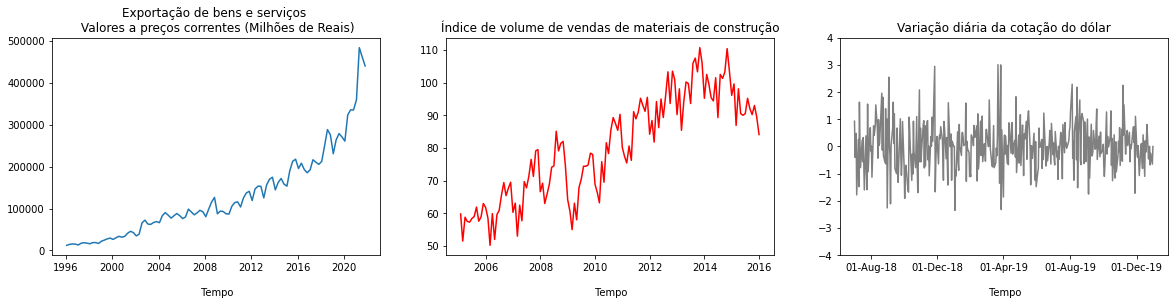

In [3]:
#@markdown  
import pandas as pd

df1=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Exportações")
df2=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="dolar")
df3=pd.read_excel("https://www.orlandoalbarracin.com.br/phyton/Series.xlsx", sheet_name="Vendas")

import matplotlib.dates as mdates

index_dates1 = pd.date_range(start='1/1/1996', end='31/12/2021', freq='3M')
index_dates2 = pd.date_range(start='7/2/2018', end='12/31/2019', freq='B')
index_dates3 = pd.date_range(start='1/1/2005', end='31/12/2015', freq='M')

df1.index=index_dates1
df2.index=index_dates2
df3.index=index_dates3

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(20,4))
ax1.plot(df1.index, df1.Exportações)
ax1.set_title('Exportação de bens e serviços \n Valores a preços correntes (Milhões de Reais)')
ax1.set_xlabel('\n Tempo')

ax2.plot(df3.index, df3["volume_vendas"], c='r')
ax2.set_title('Índice de volume de vendas de materiais de construção')
ax2.set_xlabel('\n Tempo')

ax3.plot(df2.index.to_pydatetime(), df2["Var"], c='gray')
ax3.xaxis.set_major_locator(mdates.MonthLocator([4,8,12]))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y'))
ax3.set_title('Variação diária da cotação do dólar')
ax3.set_xlabel('\n Tempo')

ax3.set_ylim([-4, 4])

# plt.tight_layout()
plt.show()


# Abordando um Problema de Séries Temporais

A análise de uma Série Temporal pode ter diferentes objetivos como:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da Série
1. Descrever o comportamento da Série 
1. Procurar periodicidades relevantes
1. Identificar anomalias

Desses, certamente, fazer previsões de valores futuros é o mais comum e o mais relevante. Aqui, neste livro, no deteremos essencialmente em conceitos e ferramentas para previsão. 






## **Passo 1** Explorando a Série Temporal

Explore seus dados. As Séries Temporais tem muitas características que as diferem de outros tipos de dados. Aqui vamos explorar basicamente este primeiro passo que vamos buscar detalhar mais adiante. Mas é importante que você tenha uma visão geral do tratamento das Séries Temporais.

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide1.PNG" width=800, align="center"> 

<br>

<small> **Passo 1. Explorando Séries Temporais.**


## **Passo 2** Selecionando Modelos Candidatos e Ferramentas

Depois de conhecer a sua Série de dados você pode passar a buscar os modelos que você julga mais adequados para tratar os dados. Em geral você vai aplicar mais vários modelos candidatos. 

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide2.PNG" width=800, align="center"> 

<br>

<small> **Passo 2. Selecione os Modelos e Ferramentas que irá usar.**

Também é a hora de selecionar as ferramentas que pretende utilizar.

## **Passo 3** Construindo e Selecionando os Melhores Modelos

Você deve partir de modelos mais simples e ir refinando os modelos, empregando modelos mais elaborados. Os modelos base que mostraremos aqui, por exemplo, já são um primeiro modelo. Em seguida, por exemplo, você pode partir de um modelo AR ou MA, antes de seguir para um modelo ARMA ou ARIMA e assim por diante, mas  você pode escolher muitos outros tipos de modelos. 

<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide3.PNG" width=800, align="center"> 

<br>

<small> **Passo 3. Comece de Modelos Mais Simples.**

Nem sempre um modelo mais complexo e elaborado é um melhor modelo para os seus dados. Para verificar se um modelo é melhor que outro são empregadas métricas como o **AIC**, **MSE**, gráficos como o **qqplot**, podendo ainda ser separados **conjuntos de treinamento e teste** das séries temporais. Mas não abordaremos isso nesta introdução.


<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide5.PNG" width=800, align="center"> 

<br>

<small> **Passo 3b. A Construção Completa de um único modelo pode exigir uma série de passos. Acima o esquemático de construção de um modelo ARIMA.**


A construção completa de um único modelo pode exigir uma série de passos e que incluem para o um mesmo modelo a **escolha de melhores parâmetros** do modelo, como no esquemático acima, os parâmetros $p, d, q$ do modelo ARIMA.  

Conjuntos de dados mais complexos ainda podem envolver mais de uma Série de Dados relacionadas.


<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/Slide4.PNG" width=800, align="center"> 

<br>

<small> **Passo 3b. A Construção Completa de um único modelo pode exigir uma série de passos. Acima o esquemático de construção de um modelo ARIMA.**

Você pode, por exemplo, pensar na Série de aluguéis de Bicicletas dependendo da Série Climática (temperaturas mais altas no verão levando ao uso maior dos passeios de bicicleta), a Série de preços do BitCoin dependendo da Série de valores do Dólar ou ainda a evolução dos casos de Covid dependendo da evolução da vacinação.

## **Passo 4** Apresentação dos Resultados

Não menos importante, ao final, é importante a apresentação dos resultados que deve ter por objetivo convencer aos interessados, nem sempre especialistas ou familiarizados com as técnicas empregadas, da validade do seu modelo para que ele seja de fato adotado para a tomada de decisões.

# Problemas Comuns no Tratamento de  Séries Reais

# Exploração de Séries Temporais

A exploração das séries depende bastante do dado em mãos, mas o principal recurso parece consistir na visualização das séries de dados para identificar certos padrões.

Duas ferramentas muito úteis são o plot dos valores ao longo do tempo e a distribuição desses valores (histograma). Vamos ver 3 séries de dados:


* A **produção anual total de arroz** (milhões de toneladas métricas) para a Guiné de **1970 a 2011**. Com uma tendência de crescimento anual.

* As **médias anuais** das áreas diárias **de manchas solares** (em unidades de milionésimos de hemisfério) de maio de **1874 a 1976**. Evidenciando o ciclo solar de 11 anos.  

* Os dados clássicos de **totais mensais de passageiros de 1949 a 1960** da companhia aérea Box & Jenkins. Evidenciando o crescimento de passageiros aéreos e a o maior número nos finais de ano.

Mais informações e para acesso aos arquivos originais, você pode acessar https://github.com/vincentarelbundock/Rdatasets. 

In [ ]:
only_trend = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/guinearice.csv', parse_dates=['date'], index_col='date')
only_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/sunspotarea.csv', parse_dates=['date'], index_col='date')
trend_and_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

only_trend.plot(title='Trend Only', legend=False, ax=ax[0])
only_season.plot(title='Season Only', legend=False, ax=ax[1])
trend_and_season.plot(title='Trend e Season Only', legend=False, ax=ax[2])

plt.show()

## Distribuição dos valores

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(20,4))

only_trend.plot.hist(title='Trend Only', legend=False, ax=ax[0], bins=100)
only_season.plot.hist(title='Season Only', legend=False, ax=ax[1], bins=100)
trend_and_season.plot.hist(title='Trend e Season Only', legend=False, ax=ax[2], bins=100)

plt.show()

## Modelo Ingênuo de Médias

Talvez, sem conhecer nada de uma série temporal, uma primeira estimativa poderia ser o seu valor médio ao longo do tempo. Esse valor é útil, pois um modelo *ingênuo* pode servir de base para modelos mais elaborados. 

Na mesma linha podemos ainda refinar essa estimativa avaliando os valores médios para diferentes períodos da série e, se você pensar que em muitos casos valores mais recentes podem ter uma influência maior na previsão de novos valores, faz sentido observarmos a média de valores mais recentes. 

In [ ]:
def plot_means(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  ax.bar(range(4), np.array([df.reset_index().iloc[ ix[0]:ix[1] ].value.mean(),
                              df.reset_index().iloc[ ix[1]:ix[2] ].value.mean(),
                              df.reset_index().iloc[ ix[2]:ix[3] ].value.mean(),
                              df.reset_index().iloc[ ix[3]:ix[4] ].value.mean()]))
  ax.hlines(df.value.mean(),0,5,color='r',linestyle='--')
  ax.text(0, df.value.mean(), 'Overall mean')
  ax.set_title('Quarter Means ')

  return

fig, ax = plt.subplots(1,3, figsize=(20,4))

plot_means(only_trend, ax=ax[0],t='Trend Only')
plot_means(only_season, ax=ax[1],t='Season Only')
plot_means(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()

In [ ]:
def plot_means2(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  df.plot(title=t, legend=False, ax=ax)
  ax.hlines(df.reset_index().iloc[ ix[3]:ix[4] ].value.mean(), df.index[0], df.index[-1],color='r',linestyle='--')
  ax.text(df.index[0], df.reset_index().iloc[ ix[3]:ix[4] ].value.mean(), 'Recent mean')

  ax.hlines(df.reset_index().value.mean(), df.index[0], df.index[-1],color='b',linestyle='--')
  ax.text(df.index[0], df.reset_index().value.mean(), 'Overall mean')

  return

fig, ax = plt.subplots(1,3, figsize=(20,4))

plot_means2(only_trend, ax=ax[0],t='Trend Only')
plot_means2(only_season, ax=ax[1],t='Season Only')
plot_means2(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()

A mesma ideia pode, por exemplo, ser aplicada a modelos de regressão aplicados a intervalos. Mas não desenvolveremos esse modelo aqui.

## Modelo ingênuo de Regressão

Alguns tipos de séries, como séries onde predomina a tendência, um modelo de regressão pode ser útil. Mas note que o modelo de regressão não é um modelo temporal.

> **O modelo de regressão não é exatamente um modelo temporal! Note que você não pode escrever um modelo $f(t) = a_0 + a_1 t$ onde $t$ é o tempo da forma que empregamos nas séries anteriores YYYY-MM-DD ou algo assim.**

Podemos entretanto criar criar uma coluna de *time-steps*, ou períodos, que podemos então empregar diretamente. 

$$ \hat y = a_0 + a_1 \text{time_steps} $$

# Caso: **Estimando a emissão de CO2 no Mundo** 

Vamos empregar modelos de regressão simples para estimar as emissões de CO2 a partir da série histórica de emissões de gases para os próximos 36 meses.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns='Date',inplace=True)
df.head()

In [ ]:
plt.figure(figsize=(12,3))
plt.plot(df.CO2)
plt.title('Emissões de CO2')
plt.show()

Por simplicidade vamos chamar nossa coluna de time. 

In [ ]:
df['time'] = np.arange(len(df))
df.head()

In [ ]:
plt.figure(figsize=(12,3))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='red'))

plt.show()

### Modelo de Regressão

In [ ]:
model = sm.ols(formula='CO2 ~ time', data=df)
result = model.fit()
print(result.summary())


### Predict 36 meses a frente... 

In [ ]:
new_times = pd.DataFrame()
new_times['time'] = np.arange(len(df), len(df) + 36)

new_times['prediction'] = result.predict(new_times)
new_times.head()

In [ ]:
plt.figure(figsize=(15,4))
sns.regplot(x='time', y='CO2', data=df, scatter_kws=dict(color='0.6'), line_kws=dict(color='blue'))

sns.lineplot(x='time', y='prediction', data=new_times, color='red')

plt.xticks(ticks=[ df['time'][0], df['time'][len(df)-1] ],labels=[ df.index[0], df.index[-1] ])
plt.show()

E esse modelo, certamente é uma estimativa bastante razoável do aumento de emissões para os próximos 3 anos.

# Decomposição de Séries Temporais

Uma **tendência** é observada quando há uma inclinação crescente ou decrescente observada na série temporal. Já a **sazonalidade** é observada quando há um padrão repetido distinto observado entre intervalos regulares devido a fatores sazonais. Pode ser por causa do mês do ano, do dia do mês, dos dias da semana ou mesmo da hora do dia. Mas, como vimos antes, não é obrigatório que todas as séries temporais tenham tendência e/ou sazonalidade. Uma série temporal pode não ter uma tendência distinta, mas ter uma sazonalidade e o contrário também pode acontecer. Há ainda uma componente de **Resíduos**, um movimento dos dados que não pode ser explicado nem pela tendência e nem pela sazonalidade. 

## Séries temporais aditivas e multiplicativas

Dependendo da natureza da tendência e da sazonalidade, uma série temporal pode ser modelada como aditiva ou multiplicativa, em que cada observação da série pode ser expressa como uma soma ou um produto dos componentes:

* Série temporal aditiva:

$$Valor = Tendência +  Sazonalidade + Resíduos$$

* Séries Temporais Multiplicativas:

$$ Valor = Tendência \times Sazonalidade \times Resíduos$$

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.sin( np.arange(0,len(index_dates),1) * np.pi/4 )  
df = pd.DataFrame()
df.index = index_dates 
df['values'] = values

plot_series(df['values'])  

In [ ]:
import ipywidgets as widgets

def f(P=20):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

w = widgets.interactive(f, P=(1, 100, 1))
display(w)



In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  
  values = values + noise*np.random.sample(len(index_dates))
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01))
display(w)

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=2):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  
  values = values*noise*np.random.sample(len(index_dates))
  values = values*trend*np.linspace(0,1,len(index_dates)) + 1
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,40,0.1))
display(w)

# Séries não Estacionárias

Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo.

> **Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo. Por exemplo, a média e a variância, e assim também o desvio padrão, mudam significativamente ao longo do tempo.**

Isso é um grande um problema para as predições e uma forma de contornarmos isso é fazendo transformações das séries temporais tornando-as estacionárias. São comuns transformações do tipo $log(x_t)$ ou de potências $x_t^2$, mas antes disso vamos ver um teste para verificar se a uma série é, de fato, signficativamente estacionária ou não. 



In [ ]:
trend_and_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')

In [ ]:
def plot_var(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  ax.bar(range(4), np.array([df.reset_index().iloc[ ix[0]:ix[1] ].value.var(),
                              df.reset_index().iloc[ ix[1]:ix[2] ].value.var(),
                              df.reset_index().iloc[ ix[2]:ix[3] ].value.var(),
                              df.reset_index().iloc[ ix[3]:ix[4] ].value.var()]))
  ax.set_title('Quarter Variances ')

  return
  
fig, ax = plt.subplots(1,3, figsize=(20,4))

trend_and_season.plot(title='Trend e Season Only', legend=False, ax=ax[0])
plot_means(trend_and_season, ax=ax[1],t='Trend and Season')
plot_var(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()


plt.show()

A Série de Passageiros Não é claramente estacionária e podemos ver a variação tanto da média como da variância ao longo do tempo.

# ADF Augmented Dickey-Fuller 

O teste **ADF Augmented Dickey-Fuller** é um teste para verificar se uma série temporal é ou não estacionária de modo significativo. É um dos testes mais simples e você pode buscar outros testes mais elaborados se precisar aplicá-los de fato. Na prática, todos esses testes são limitados a poucas características de não estacionariadade, e pode ser necessário aplicar mais de um teste e, mesmo, uma inspeção visual pode ser às vezes mais importante e reveladora.

Aqui a hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.

Assim, de modo prático,

$p-valor \gt 0,05$ : Falha ao rejeitar a hipótese nula ($H0$), **a série não é estacionária**.

$p-value \le 0.05$ : Rejeitar a hipótese nula ($H0$), **a série é estacionária**.

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=4):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 2
  values = values * noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Ou, se preferir uma versão mais simplificada, 

In [ ]:
def isSeriesStationary(series):
  pValue = adfuller(series)[1]
  if pValue > 0.05:
      return False
  else:
      return True

isSeriesStationary(df['values'])  

# Tornando uma Série Estacionária 

Várias transformações podem ser aplicadas para tornar uma série estacionária. A ideia é aplicar a transformação, empregar a série estacionária para a criar um modelo de predição e, feita a predição, aplicar a inversa da transformação para obter o resultado da série original.

Vários tipos de transformação podem ser aplicadas o que vai depender da série de dados e não há uma regra para isso. Mas são comuns a aplicação de $log(x_t)$, funções de potência como $x_t^{exp}$, ou ainda funções de diferença, como abaixo, que podem remover tendências e sazonalidades dos dados.





<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/TimeSeriesFlows.png" width=800, align="center"> 

<br>

<small> **No emprego de vários modelos, estatísticos ou não, é comum trasformarmos a série em estacionária para aplicação dos modelos e previsões.**

Veja, por exemplo, como a aplicação do `log()` *estabiliza* o desvio padrão de variância da série original. 

In [ ]:
trend_and_season_log = np.log(trend_and_season) 

plt.subplot(1,2,1)
plt.plot(trend_and_season, label='Série')
plt.plot(trend_and_season.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log, label='Log Série')
plt.plot(trend_and_season_log.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(1,2,1)
plt.plot(trend_and_season.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.tight_layout()
plt.show()

## Transformação de diferença
A diferenciação é um método de transformar um conjunto de dados de série temporal que pode tanto remover tendências e sazonalidades dos dados.

A ideia transformarmos a série de dados em uma série de diferenças em um dado intervalo para obtermos a série estacionária $y_e$.

$$ y_e(t) = y(t) - y(t- \text{intervalo}) $$

Vamos criar uma nova série $y_e$ baseada na série original $y$ considerando o intervalo $1$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=0.2):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 10
  values = values + noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1

  values = values

  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  df = df.diff().dropna() 
  plot_series(df['values'])  

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Agora os dados se mostram, tanto graficamente como pelo teste ADF, estacionários.

# Caso: **Estimando a emissão de CO2 no Mundo** 

Vamos empregar o teste para verificar a não estacionariedade na série de emissões de CO2.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns='Date',inplace=True)
df.head()

In [ ]:
plot_series(df['CO2'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
isSeriesStationary(df['CO2'])  

# Tornando a Série Estacionária 

Vamos criar uma nova série $y_e$ baseada na série original $y$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$



In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2'].diff().dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
isSeriesStationary(df['CO2'].diff().dropna())  

In [ ]:
plot_series(df['CO2'].diff().dropna())

# Random Walk: Valores Aleatórios

Um caso especial de Série Temporal que você pode encontrar é quando a Série não apresenta de fato uma dependendência temporal mas é constituída de valores aleatórios. Embora apareçam diferentes valores no tempo eles não tem correlação com valores anteriores ou mesmo com o período. Séries como essa apresentam um gráfico de Auto Correlação e Auto Correlação Parcial muito característicos e para esse tipo de Série modelos estatísticos sofisticados (do AR, MA, ARIMA ou mais) e mesmo modelos de aprendizado de máquina podem fazer pouco, sendo preferível o uso de modelos bastante simples de médias.

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.random.sample( len(index_dates) )  
random_walk = pd.DataFrame()
random_walk.index = index_dates 
random_walk['values'] = values

plot_series(random_walk['values'])  

yt = St + Tt + Rt

where yt = data at period t

Tt = trend-cycle component at period t

St = seasonal component at period t

Rt = remainder component at period t




Padrões de séries temporais: tendência, sazonal e cíclico
Tendência :
Existe uma tendência quando há um aumento ou diminuição de longo prazo nos dados. Não precisa ser linear. Às vezes, nos referimos a uma tendência como “mudança de direção”, quando ela pode passar de uma tendência crescente para uma tendência decrescente.

Sazonal :
Um padrão sazonal ocorre quando uma série temporal é afetada por fatores sazonais, como a época do ano ou o dia da semana. A sazonalidade é sempre de um período fixo e conhecido (dentro de uma estação, um ano, etc.).

Cíclico :
Um ciclo ocorre quando os dados apresentam subidas e descidas que não são de frequência fixa . Essas flutuações geralmente são devidas a condições econômicas e muitas vezes estão relacionadas ao “ciclo de negócios”. A duração dessas flutuações é geralmente de pelo menos 2 anos.

Muitas pessoas confundem comportamento cíclico com comportamento sazonal, mas na verdade são bem diferentes. Se as flutuações não são de frequência fixa, então elas são cíclicas; se a frequência é imutável e associada a algum aspecto do calendário, então o padrão é sazonal. Em geral, a duração média dos ciclos é maior do que a duração de um padrão sazonal, e as magnitudes dos ciclos tendem a ser mais variáveis ​​do que as magnitudes dos padrões sazonais.

2.4Parcelas sazonais
Um gráfico sazonal é semelhante a um gráfico de tempo, exceto que os dados são plotados em relação às “estações” individuais nas quais os dados foram observados. Um gráfico sazonal permite que o padrão sazonal subjacente seja visto com mais clareza e é especialmente útil na identificação de anos em que o padrão muda.

2.7.1Autocorrelação
Assim como a correlação mede a extensão de uma relação linear entre duas variáveis, a autocorrelação mede a relação linear entre os valores defasados ​​de uma série temporal.

Existem vários coeficientes de autocorrelação, correspondentes a cada painel no gráfico de defasagem. Por exemplo, 
r
1
 mede a relação entre 

 mede a relação entre 
 e assim por diante.

O coeficiente de correlação da amostra (pearson) é definido como:
dado 

 obtemos o coeficiente de autocorrelação:
Os coeficientes de autocorrelação compõem a função de autocorrelação ou ACF .

1.1.1 Differencing
Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of r1 is often large and positive.

p1 <- google_2015 %>% 
  ACF(Close) %>% 
  autoplot()
p2 <- google_2015 %>% 
  ACF(difference(Close)) %>% 
  autoplot()

In [ ]:
#@markdown imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import periodogram


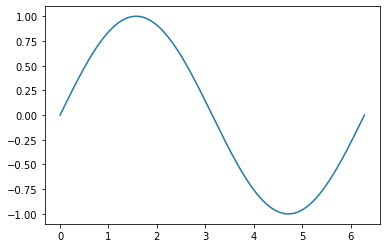

In [ ]:
plt.plot( np.linspace(0,2 * np.pi, 1000) , np.sin( np.linspace(0,2 * np.pi, 1000) ) )

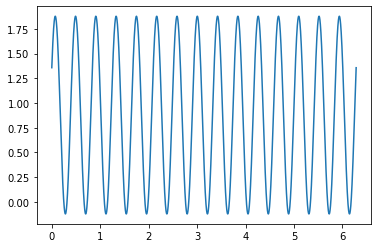

In [ ]:
sin_phase = 1
cos_phase = 1
sin_scale = 1 
cos_scale = 1
sin_f =  15
cos_f =  0
T = 12

v = np.sin( sin_f * np.linspace(0,2 * np.pi, T*1000) + sin_phase/2 ) + np.cos(  cos_f * np.linspace(0,2 * np.pi, T*1000) + cos_phase/2 )
plt.plot(np.linspace(0,2 * np.pi, T*1000), v)
plt.show()




In [ ]:
len(v)

12000

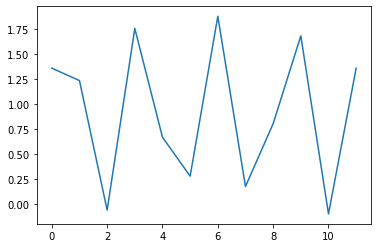

In [ ]:
plt.plot( np.arange(0,12), v[ np.linspace(0,len(v)-1,T).astype(int) ] )

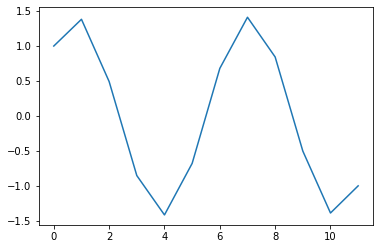

In [ ]:
sin_phase = 0
cos_phase = 0
sin_scale = 1
cos_scale = 1
sin_T =  2 * np.pi
cos_T =  2 * np.pi
T = 12



St_sin_cos = sin_scale * np.sin(  2 * np.pi / sin_T * np.arange(0,T,1) + sin_phase/2 ) + cos_scale * np.cos( 2 * np.pi / cos_T * np.arange(0,T,1) + cos_phase/2 ) 

plt.plot(St_sin_cos)
plt.show()

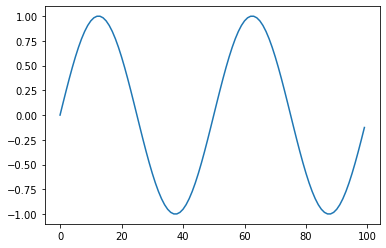

In [ ]:
plt.plot( np.sin( 2 * np.pi / 50 * np.arange(0,100,1) ) )

In [ ]:
#@markdown **plot_series()** Decomposição de Séries Temporais + ACF + PACF
def plot_series(values, decomp_type='additive', max_lags=30):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline 
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  # from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type)

  ax[0].plot(decomposition.trend)
  ax[0].plot(decomposition.trend.index, Tt,'r:')
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  ax[1].plot(decomposition.seasonal.index, St,'r:')
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  ax[2].plot(decomposition.resid.index, Rt,'r:')
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

#  rcParams['figure.figsize'] = 14,3
#  fig, ax = plt.subplots(nrows=1, ncols=3)

#  plot_acf(values, ax=ax[0], lags = max_lags)
#  plot_pacf(values, ax=ax[1], lags = max_lags)


  # periods = periodogram(values)
  # # print(periods)
  # ax[2].bar(x=range(len(periods)), height=periods)
  # plt.title('Periodogram')

#  plt.tight_layout()
#  plt.show()

  warnings.filterwarnings('once')

  return 




In [ ]:
np.array([1,2,3]) * np.array([1,2,4])

array([ 1,  4, 12])

In [ ]:
from sympy import *

In [ ]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y


In [ ]:
expr.evalf(subs={x:1, y:3})

7.00000000000000

In [ ]:
np.ones([3,1])

array([[1.],
       [1.],
       [1.]])

In [ ]:
np.array([ [ 1, 0 ,0], [0, 1, 0], [0, 0 , 1], [ -1, -1, -1], [ -1, -1, -1], [ -1, -1, -1]]) @ np.array([1, -1, 0]).T

array([ 1, -1,  0,  0,  0,  0])

In [ ]:
np.random.seed(123)
start='1/1/2018'
end='1/2/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)

n = len(t)
m = 1

C = np.arange(1,n+1).reshape([n,1])

for i in range(m):
  C = np.append( C , C[:,i].reshape([n,1])**i, axis=1 )

Matrix(C)  

b = np.array( [ 1 , 2 ])

Matrix(b)

T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

# Matrix(D) 

a_before = np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])

a = a_before - np.abs( a_before.mean() )
Matrix(a)

R = np.random.rand(n).T * 2

# Matrix(R)

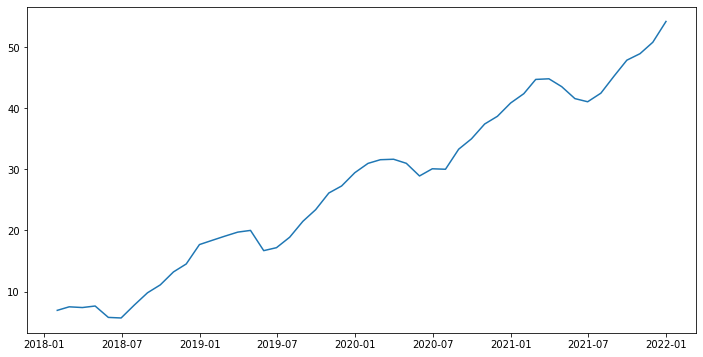

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( index_dates,  C @ b + D @ a + R )
plt.show()

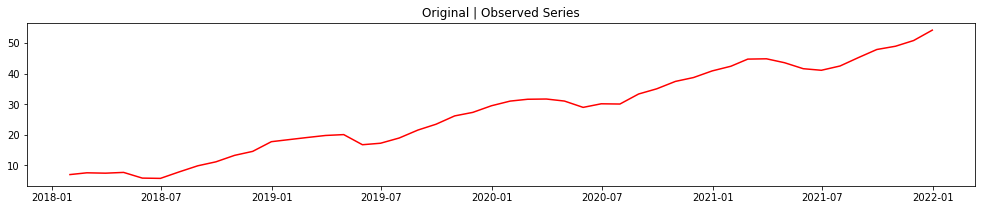

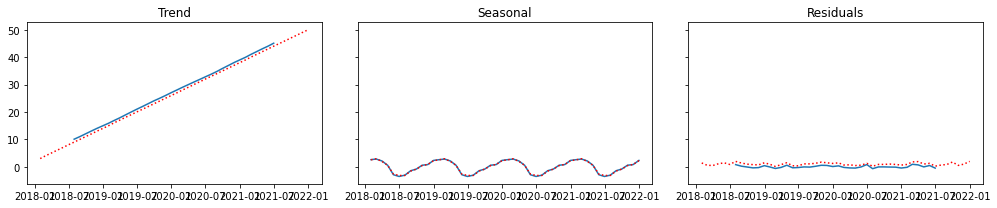

In [ ]:
df = pd.DataFrame()
df.index = index_dates
X = C @ b + D @ a + R 
df['values'] = X


Rt = R
Tt = C @ b 
St = D @ a  

plot_series(df['values'])  

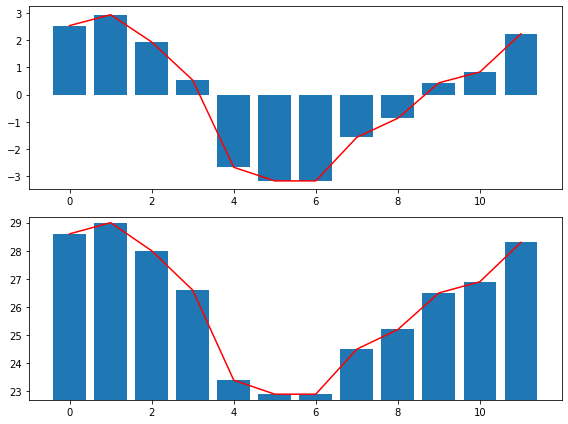

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=a)
plt.plot(a,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,values
2018-01-31,6.926272
2018-02-28,7.505612
2018-03-31,7.387036
2018-04-30,7.635963
2018-05-31,5.772271


In [ ]:
df['R'] = Rt  
df['T'] = Tt 
df['S'] = St  
df['t'] = np.arange(0,len(df))

df.head()

,values,R,T,S,t
2018-01-31,6.926272,1.392938,3,2.533333,0
2018-02-28,7.505612,0.572279,4,2.933333,1
2018-03-31,7.387036,0.453703,5,1.933333,2
2018-04-30,7.635963,1.102630,6,0.533333,3
2018-05-31,5.772271,1.438938,7,-2.666667,4


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='values ~ t', data=df)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 values   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1715.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.62e-38
Time:                        14:06:56   Log-Likelihood:                -107.10
No. Observations:                  48   AIC:                             218.2
Df Residuals:                      46   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1614      0.654      6.361      0.0

In [ ]:
df['pred-T'] = model.predict(df.t)

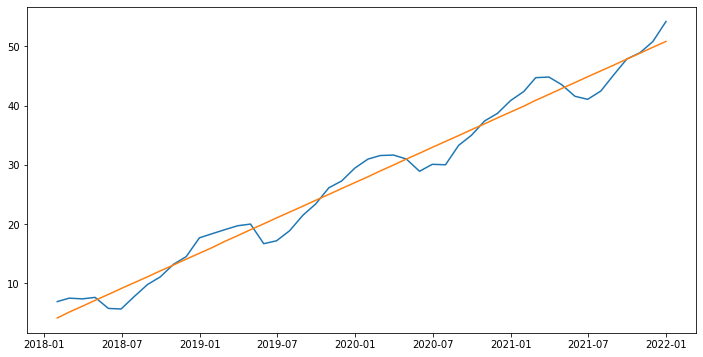

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, model.predict(df.t) )
plt.show()

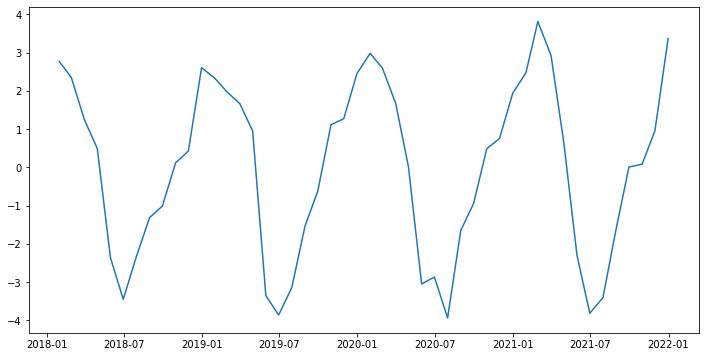

In [ ]:
df['values-pred-T'] = df['values'] - model.predict(df.t)

plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values-pred-T'] )
plt.show()

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

df['quarter'] = df.index.quarter

df['semester'] = 1 + (df.index.month > 6)

In [ ]:
df

,values,R,T,S,t,pred-T,values-pred-T,month,year,quarter,semester
2018-01-31,6.926272,1.392938,3,2.533333,0,4.161420,2.764851,1,2018,1,1
2018-02-28,7.505612,0.572279,4,2.933333,1,5.154481,2.351131,2,2018,1,1
2018-03-31,7.387036,0.453703,5,1.933333,2,6.147542,1.239494,3,2018,1,1
2018-04-30,7.635963,1.102630,6,0.533333,3,7.140603,0.495359,4,2018,2,1
2018-05-31,5.772271,1.438938,7,-2.666667,4,8.133664,-2.361393,5,2018,2,1
2018-06-30,5.679546,0.846213,8,-3.166667,5,9.126725,-3.447179,6,2018,2,1
2018-07-31,7.794862,1.961528,9,-3.166667,6,10.119787,-2.324925,7,2018,3,2
2018-08-31,9.802993,1.369659,10,-1.566667,7,11.112848,-1.309855,8,2018,3,2
2018-09-30,11.095197,0.961864,11,-0.866667,8,12.105909,-1.010711,9,2018,3,2
2018-10-31,13.217568,0.784235,12,0.433333,9,13.098970,0.118599,10,2018,4,2


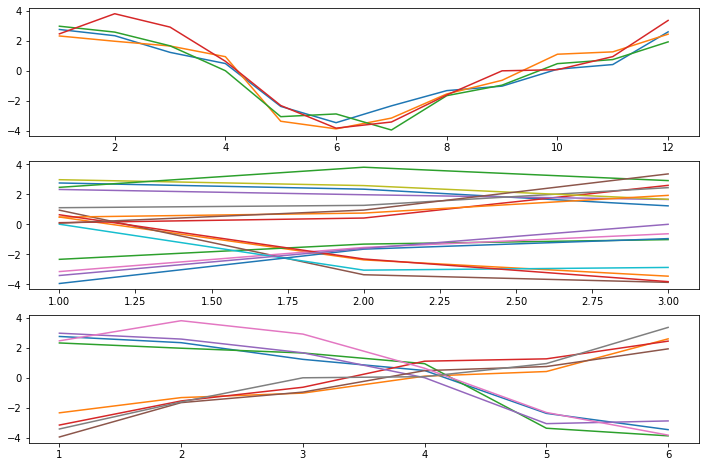

In [ ]:
plt.figure(figsize=(12,8))

i = 1

# for period in ['year','quarter','semester']:
plt.subplot(3,1,1)
period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['values-pred-T'])

plt.subplot(3,1,2)
period = 'quarter'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values-pred-T'])

plt.subplot(3,1,3)
period = 'semester'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values-pred-T'])

plt.show()



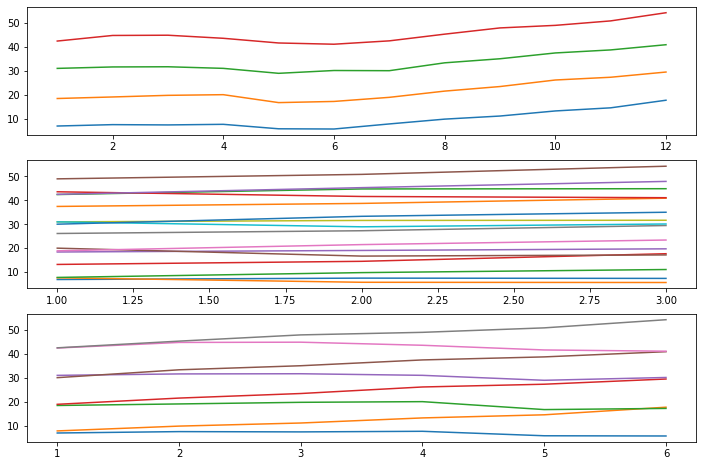

In [ ]:
plt.figure(figsize=(12,8))

i = 1

# for period in ['year','quarter','semester']:
plt.subplot(3,1,1)
period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['values'])

plt.subplot(3,1,2)
period = 'quarter'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values'])

plt.subplot(3,1,3)
period = 'semester'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values'])

plt.show()

In [ ]:
values_month_mean = (df.groupby('month')['values-pred-T'].mean() - df.groupby('month')['values-pred-T'].mean().mean()).values
values_month_mean


array([ 2.63873238,  2.68483593,  1.87611443,  0.52733624, -2.76561599,
       -3.49591452, -3.20069893, -1.52202061, -0.64142162,  0.45210984,
        0.85445286,  2.59208998])

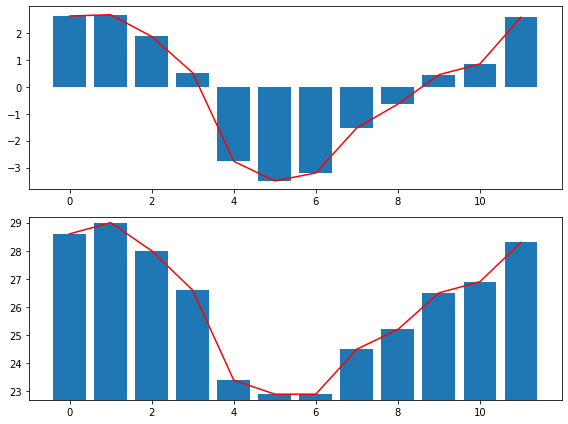

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=values_month_mean)
plt.plot(values_month_mean,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean

In [ ]:
df['pred-values'] = df['pred-T'] + df['pred-S']

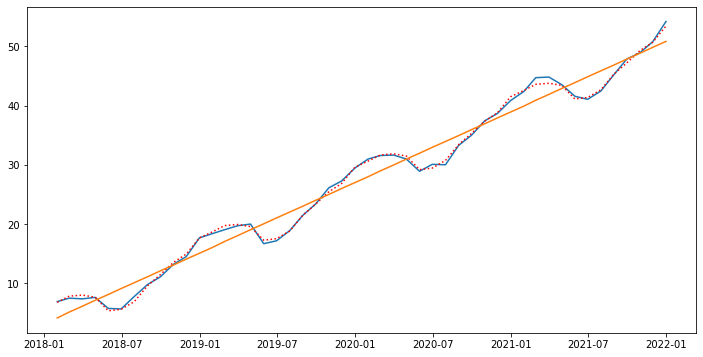

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )
plt.show()

In [ ]:
# calculate manually
d = df['values'] - df['pred-values']
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 0.3572481966726053
MSE: 0.2044312859156072
RMSE: 0.452140781079972


In [ ]:
np.random.seed(123)
start='1/1/2022'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)



In [ ]:
df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

I = df[ df.t == df.t.max() ]['values'].values - df[ df.t == df.t.min() ]['values'].values

forecast_T = model.predict( df_forecast['t'] ) + I 
forecast_S = values_month_mean[0:12]
forecast_values = forecast_T + forecast_S

df_forecast['values'] = forecast_values

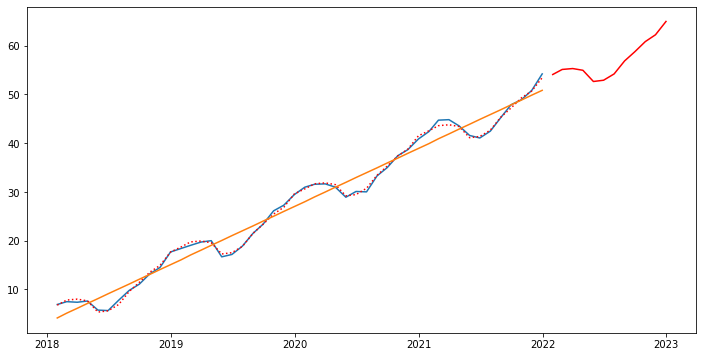

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )

plt.plot( df_forecast.index, df_forecast['values'],'r' )
plt.show()

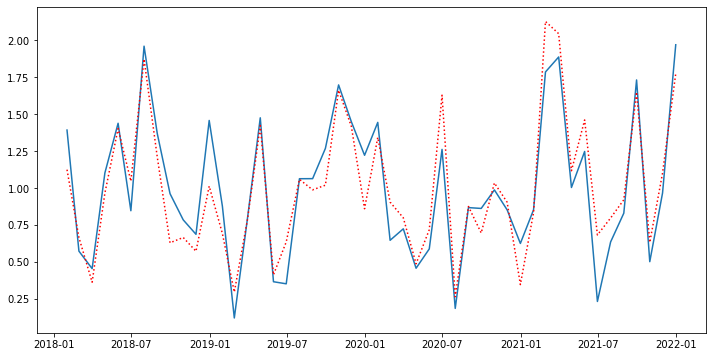

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index,df['R'] )
plt.plot( df.index,d + df['R'].mean(), 'r:' )
plt.show()

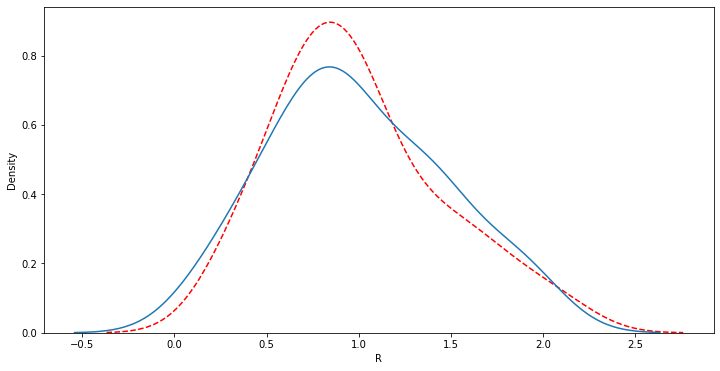

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.kdeplot(d + df['R'].mean(), ax=ax, color='red', linestyle='dashed') 
sns.kdeplot(df['R'], ax=ax)
plt.show()

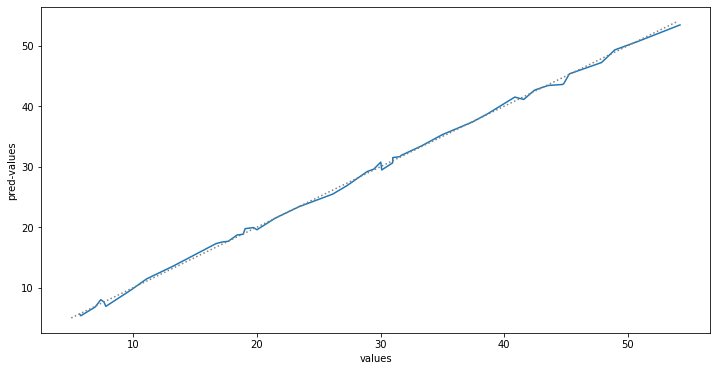

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.lineplot( x=df['values'],y=df['pred-values'])
plt.plot( np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100), np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100),
         color='gray',linestyle='dotted')

plt.show()

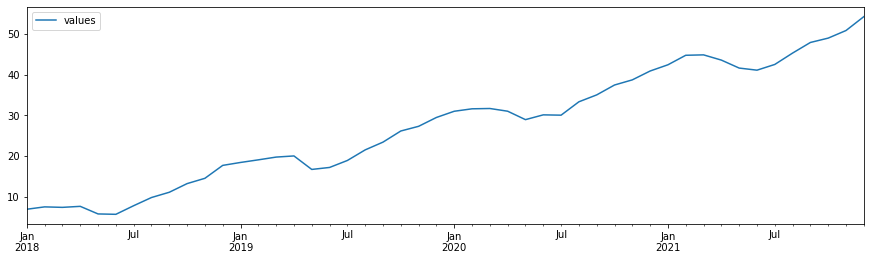

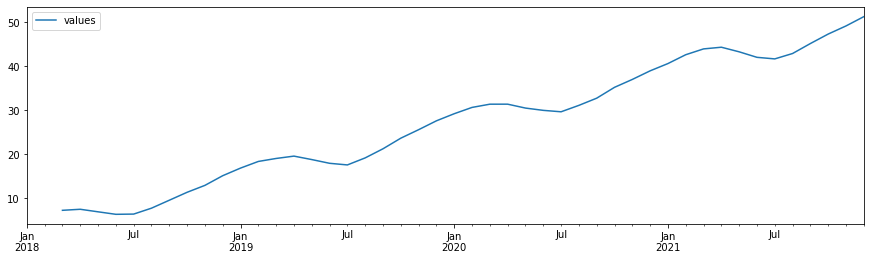

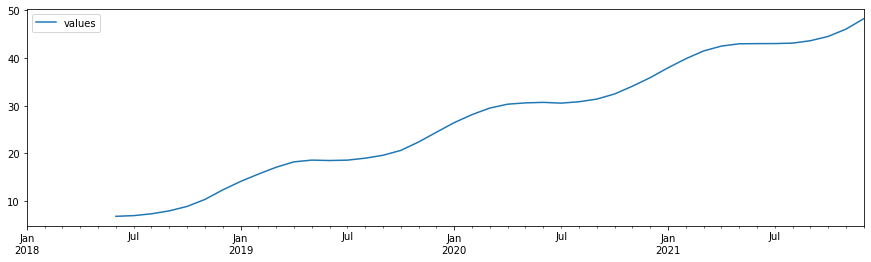

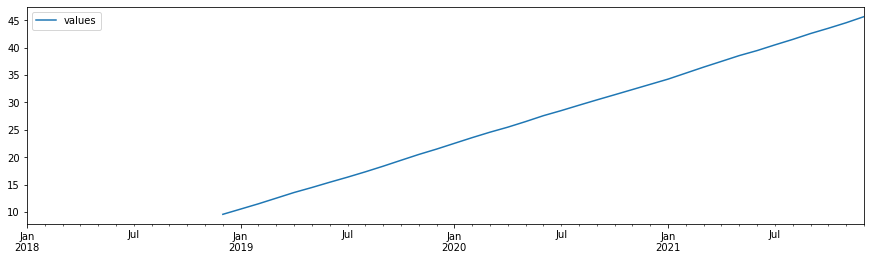

In [ ]:
df[['values']].rolling(1).mean().plot(figsize=(15,4))
df[['values']].rolling(3).mean().plot(figsize=(15,4))
df[['values']].rolling(6).mean().plot(figsize=(15,4))
df[['values']].rolling(12).mean().plot(figsize=(15,4))
plt.show()

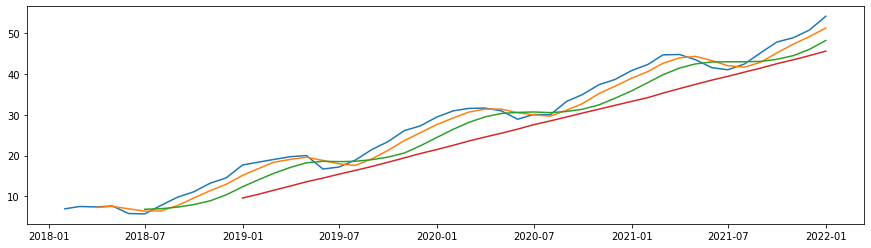

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].rolling(1).mean())
plt.plot(df[['values']].rolling(3).mean())
plt.plot(df[['values']].rolling(6).mean())
plt.plot(df[['values']].rolling(12).mean())
plt.show()

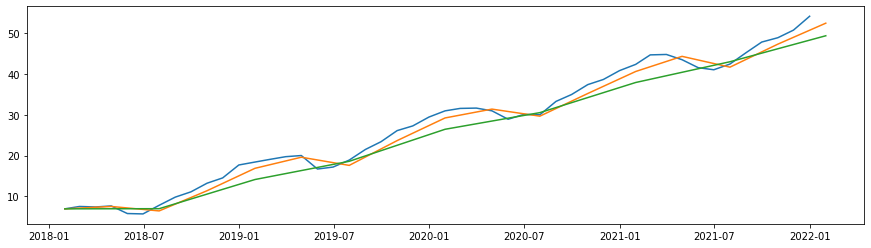

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].resample('M').mean())
plt.plot(df[['values']].resample('3M').mean())
plt.plot(df[['values']].resample('6M').mean())
plt.show()

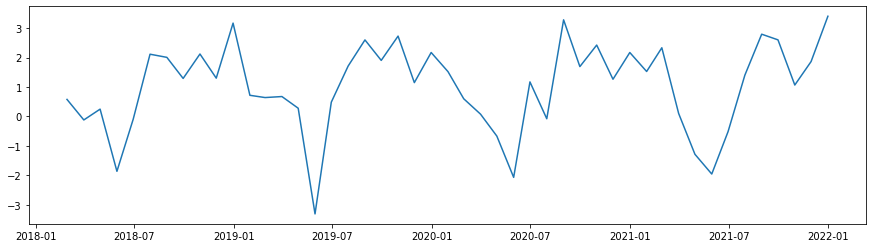

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].diff())
plt.show()

In [ ]:
df[['values-t']] = df[['values']].diff()

values_month_mean = (df.groupby('month')['values-t'].mean() - df.groupby('month')['values-t'].mean().mean()).values
values_month_mean



array([ 0.24554521,  0.02802148, -0.82680358, -1.36686027, -3.31103431,
       -0.7483806 ,  0.27713351,  1.66059624,  0.86251692,  1.07544938,
        0.38426094,  1.71955505])

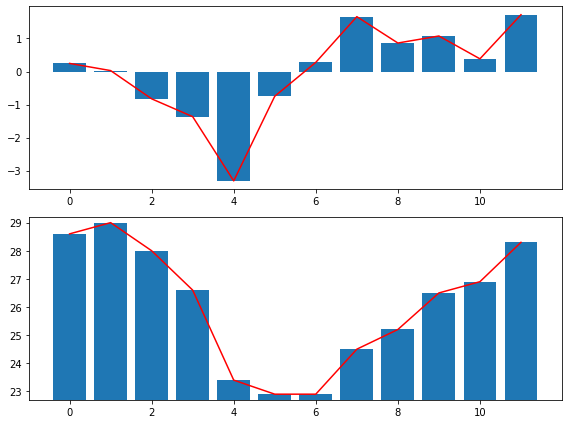

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=values_month_mean)
plt.plot(values_month_mean,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean # + b[0]

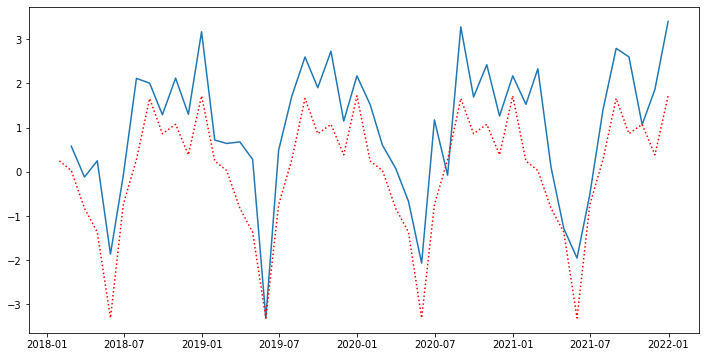

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot(df[['values-t']])
plt.plot( df.index, df['pred-S'],'r:')
plt.show()

In [ ]:
np.array(df['values'])[0]

6.926271704529062

In [ ]:

df['pred-values'] = df['values-t'].cumsum() + df['pred-S'] + np.array(df['values'])[0]

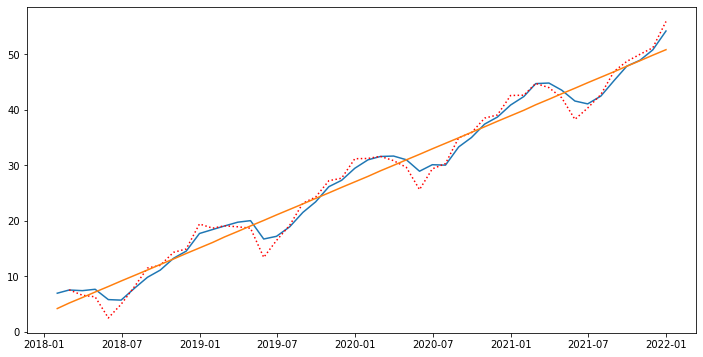

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )
plt.show()

In [ ]:
# calculate manually
d = df['values'] - df['pred-values']
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 1.05912946309724
MSE: 1.868967923905033
RMSE: 1.3671020166414183


In [ ]:
np.random.seed(123)
start='1/1/2022'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)



In [ ]:
df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

df_forecast

,t
2022-01-31,0
2022-02-28,1
2022-03-31,2
2022-04-30,3
2022-05-31,4
2022-06-30,5
2022-07-31,6
2022-08-31,7
2022-09-30,8
2022-10-31,9


In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean # + b[0]

In [ ]:




df_forecast['values'] = df['values-t'].cumsum() + df['pred-S'] + np.array(df['values'])[0]

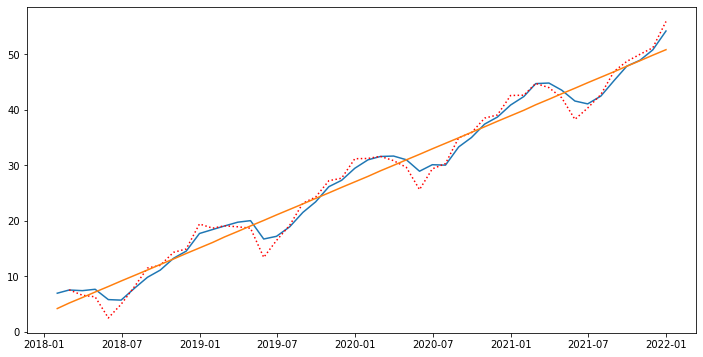

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )

plt.plot( df_forecast.index, df_forecast['values'],'r' )
plt.show()

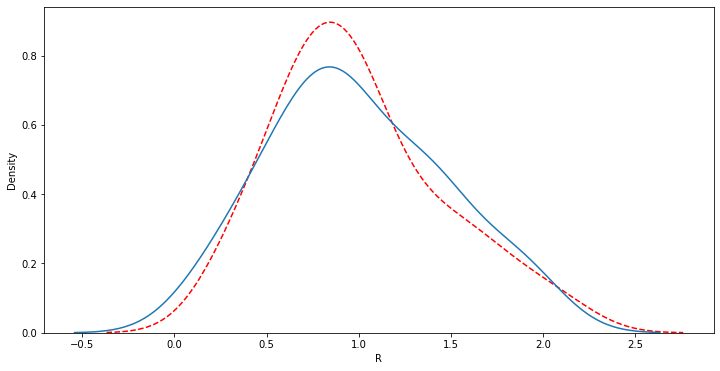

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.kdeplot(d + df['R'].mean(), ax=ax, color='red', linestyle='dashed') 
sns.kdeplot(df['R'], ax=ax)
plt.show()

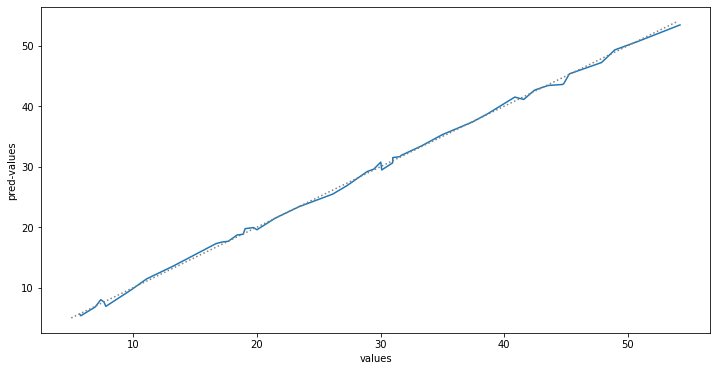

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.lineplot( x=df['values'],y=df['pred-values'])
plt.plot( np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100), np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100),
         color='gray',linestyle='dotted')

plt.show()

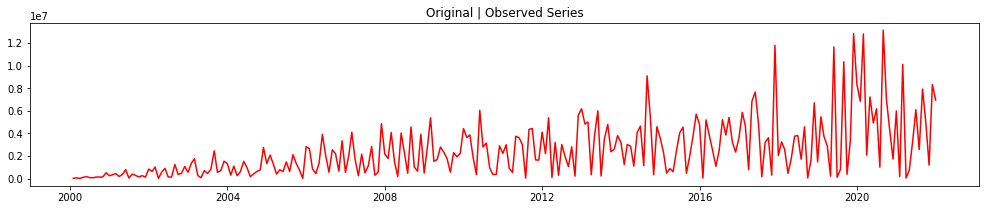

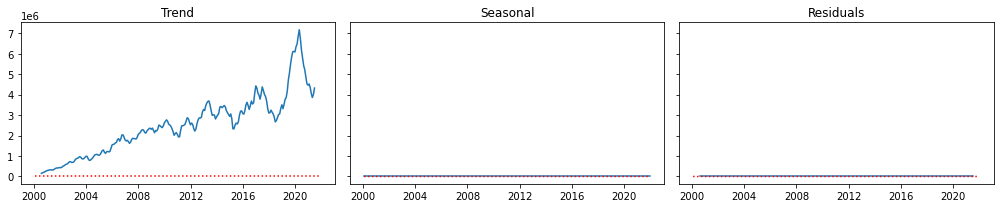

In [ ]:

start='1/1/2000'
end='1/1/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)

scale_T = 1
scale_S = 200
scale_R = 100    

Rt = np.random.rand(len(index_dates))*scale_R

b0 = 1 
b1 = 2
vector_T = np.array([b0, b1])

p = np.poly1d(np.flip(vector_T))

Tt =  p(t)

if freq == 'M': T = 12

Dj = np.ones(12)

sin_phase = 0
cos_phase = 0
sin_scale = 1
cos_scale = 1
sin_T =  2 * np.pi
cos_T =  2 * np.pi
T = 12

St_sin_cos = sin_scale * np.sin(  2 * np.pi / sin_T * np.arange(0,T,1) + sin_phase/2 ) + cos_scale * np.cos( 2 * np.pi / cos_T * np.arange(0,T,1) + cos_phase/2 ) 

St_sin_cos = np.abs( St_sin_cos )

St = np.zeros(len(index_dates))
for i in range(len(index_dates)):
  j = i % T
  St[i] = scale_S * St_sin_cos[j] * Dj[j]


# Xt = Tt + St + Rt

# = np.sin( np.arange(0,len(index_dates),1) * np.pi/4 )  
df = pd.DataFrame()
df.index = index_dates 
df['values'] = Tt * St * Rt
df['values'] = df['values'] + np.abs( df['values'].min() ) + 0.01

plot_series(df['values'], decomp_type='multiplicative')  



In [ ]:
plt.plot(St_sin_cos)

In [ ]:
decomposition = seasonal_decompose(df['values'], model='additive')
  
decomposition.trend.index